In [321]:
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re
from re import search
import time
import pickle
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [873]:
final = pd.read_csv('final_data.csv', index_col=0)

In [874]:
final.describe()

,Domestic opening,Domestic total gross,Worldwide Gross,Budget,Runtime
count,1060.00,1060.00,1060.00,1060.00,1060.00
mean,37813458.29,140689024.14,334307541.14,81814599.06,114.86
std,34406034.95,102334506.96,298282233.33,60685352.12,20.00
min,14466.00,40826341.00,42580920.00,15000.00,78.00
25%,17459135.00,81239022.75,154573605.75,35000000.00,99.00
50%,29125360.50,110492896.00,238898955.00,66000000.00,113.00
75%,46537205.50,167838594.75,400611351.25,115000000.00,127.25
max,357115007.00,936662225.00,2847246203.00,362000000.00,201.00


In [875]:
final.sample(10)

,Domestic opening,Domestic total gross,Worldwide Gross,Budget,Runtime,Rating,Release date,Distributor,Genre
Title,,,,,,,,,
Edge of Tomorrow,28760246.00,100206256,370541256.00,178000000.00,113.00,PG-13,"May 28, 2014",Warner Bros.,Action Adventure Sci-Fi
The Proposal,33627598.00,163958031,317375031.00,40000000.00,108.00,PG-13,"June 17, 2009",Walt Disney Studios Motion Pictures,Comedy Drama Romance
Alvin and the Chipmunks: Chipwrecked,23244744.00,133110742,342695435.00,75000000.00,87.00,G,"December 14, 2011",Twentieth Century Fox,Adventure Animation Come...
Transformers,70502384.00,319246193,709709780.00,150000000.00,144.00,PG-13,"June 28, 2007",DreamWorks,Action Adventure Sci-Fi
Jack Reacher,15210156.00,80070736,218340595.00,60000000.00,130.00,PG-13,"Dec 21, 2012",Paramount Pictures,Action Thriller
The Devil Wears Prada,27537244.00,124740460,326706115.00,35000000.00,109.00,PG-13,"June 30, 2006",Twentieth Century Fox,Comedy Drama
Saw III,33610391.00,80238724,164874275.00,10000000.00,108.00,R,"October 27, 2006",Lionsgate,Crime Horror Mystery ...
Norbit,34195434.00,95673607,159814490.00,60000000.00,103.00,PG-13,"February 9, 2007",DreamWorks,Comedy Romance
A Few Good Men,15517468.00,141340178,243240178.00,41000000.00,138.00,R,"December 11, 1992",Columbia Pictures,Drama Thriller


In [876]:
final.describe()

,Domestic opening,Domestic total gross,Worldwide Gross,Budget,Runtime
count,1060.00,1060.00,1060.00,1060.00,1060.00
mean,37813458.29,140689024.14,334307541.14,81814599.06,114.86
std,34406034.95,102334506.96,298282233.33,60685352.12,20.00
min,14466.00,40826341.00,42580920.00,15000.00,78.00
25%,17459135.00,81239022.75,154573605.75,35000000.00,99.00
50%,29125360.50,110492896.00,238898955.00,66000000.00,113.00
75%,46537205.50,167838594.75,400611351.25,115000000.00,127.25
max,357115007.00,936662225.00,2847246203.00,362000000.00,201.00


In [877]:
final.sort_values(by='Worldwide Gross', ascending=False).head(5)

,Domestic opening,Domestic total gross,Worldwide Gross,Budget,Runtime,Rating,Release date,Distributor,Genre
Title,,,,,,,,,
Avatar,77025481.00,760507625,2847246203.00,237000000.00,162.00,PG-13,"December 16, 2009",Twentieth Century Fox,Action Adventure Fantasy...
Avengers: Endgame,357115007.00,858373000,2797501328.00,356000000.00,181.00,PG-13,"April 24, 2019",Walt Disney Studios Motion Pictures,Action Adventure Drama ...
Titanic,28638131.00,659363944,2201647264.00,200000000.00,194.00,PG-13,"December 19, 1997",Paramount Pictures,Drama Romance
Star Wars: Episode VII - The Force Awakens,247966675.00,936662225,2069521700.00,245000000.00,138.00,PG-13,"December 16, 2015",Walt Disney Studios Motion Pictures,Action Adventure Sci-Fi
Avengers: Infinity War,257698183.00,678815482,2048359754.00,362000000.00,149.00,PG-13,"April 25, 2018",Walt Disney Studios Motion Pictures,Action Adventure Sci-Fi


In [878]:
sns.pairplot(final)

<AxesSubplot:>

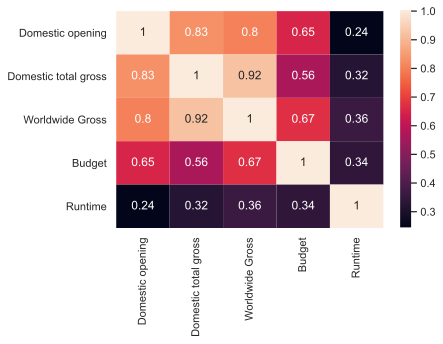

In [880]:
sns.heatmap(final.corr(), annot = True)

In [882]:
#We see that budget has a significant correlation. 

# Dummies creation

In [271]:
genre = final.Genre.str.split(' ', expand=True).stack()

In [272]:
genre = pd.get_dummies(genre, prefix='G').groupby(level=0).sum()

In [274]:
genre = genre.drop(['G_', 'G_Documentary'], axis=1) #Documentary will be the base feature

In [276]:
distr = final.Distributor

In [277]:
distr = pd.get_dummies(distr).groupby(level=0).sum()

In [278]:
distr.shape

(1060, 38)

In [280]:
distr = distr.drop(['Columbia Pictures'], axis=1) #Columbia Pictures will be the base feature

In [281]:
distr.shape

(1060, 37)

In [282]:
rat = final.Rating
rat = pd.get_dummies(rat).groupby(level=0).sum()

,G,PG,PG-13,R
Title,,,,
"10,000 BC",0,0,1,0
13 Hours,0,0,0,1
1408,0,0,1,0


In [283]:
rat = rat.drop(['R'], axis=1) #The base feature will be R

In [284]:
rat.shape

(1060, 3)

In [285]:
final = pd.concat([final , rat , distr , genre ], axis=1)
final = final.drop(['Rating', 'Distributor', 'Genre'], axis=1)

In [525]:
final.shape

(1060, 66)

In [526]:
final.columns

Index(['Domestic opening', 'Domestic total gross', 'Worldwide Gross', 'Budget',
       'Runtime', 'Release date', 'G', 'PG', 'PG-13', '20th Century Studios',
       'Artisan Entertainment', 'Dimension Films', 'DreamWorks',
       'DreamWorks Distribution', 'Entertainment Studios Motion Pictures',
       'FilmDistrict', 'Focus Features', 'Fox Searchlight Pictures',
       'Gramercy Pictures (I)', 'IFC Films', 'Lionsgate', 'MGM/Weinstein',
       'Metro-Goldwyn-Mayer (MGM)', 'Miramax', 'Neon', 'New Line Cinema',
       'Newmarket Films', 'Overture Films', 'Paramount Pictures',
       'Relativity Media', 'Revolution Studios', 'Roadside Attractions',
       'Rogue Pictures', 'STX Entertainment', 'Screen Gems',
       'Sony Pictures Classics', 'Sony Pictures Entertainment (SPE)',
       'Summit Entertainment', 'The Weinstein Company', 'TriStar Pictures',
       'Twentieth Century Fox', 'USA Films', 'United Artists',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       

In [680]:
#Creating a simple training/validation/test

In [799]:
X, y = final.drop(['Domestic opening', 'Worldwide Gross', 'Release date', 'Domestic total gross'], axis = 1),\
final['Worldwide Gross']

In [800]:
print(X.shape, '\n', y.shape)

(1060, 62) 
 (1060,)


In [801]:
#Separating the data into 80 and 20%

In [802]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)

In [803]:
print( X.shape, ' ' , X_test.shape, '\n' , y.shape, ' ' ,y_test.shape)

(848, 62)   (212, 62) 
 (848,)   (212,)


In [804]:
#Further separating the X and y data into training and validation (75 and 25%)

In [805]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=4)

In [806]:
print( X_train.shape, ' ' , X_val.shape, '\n' , y_train.shape , ' ' ,y_val.shape)

(636, 62)   (212, 62) 
 (636,)   (212,)


In [807]:
#We will train a simple validation model. 

In [808]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression R^2: {lm.score(X_val, y_val):.4f}')
print(f'The intercept for this model is: {lm.intercept_}')
print(f'The coefficients are: {lm.coef_}')

Linear Regression R^2: 0.4483
The intercept for this model is: -413817382.0664928
The coefficients are: [ 2.29491005e+00  4.40533598e+06 -3.96046319e+07 -3.02610667e+06
  9.43581609e+06 -4.14252281e-06  2.81713187e+08  2.43692111e+07
  7.25844174e+07  5.86365335e+07  9.06213630e+07  2.48277709e+07
  8.22766401e+07  1.11067898e+08  2.40643874e+08  2.46101990e-06
  1.14170755e+08  1.18927842e+07  1.49088636e+06 -1.35741055e+07
 -8.67061317e-07  2.28757461e+08  4.51633973e+08 -1.13248825e-06
  4.01098608e+07  8.60794298e+07  5.15923571e+07  1.01121021e+08
  1.23143439e+08  7.28413124e+07  5.59399444e+07  7.45058060e-07
  6.89292610e+07  3.12381802e+08  1.56358767e+08  1.41926336e+08
  1.11500002e+08 -4.47034836e-07  2.85620504e+08  9.46231925e+07
  1.09008133e+08  9.06858243e+07 -2.59267106e+07  4.26792571e+07
  1.34319585e+08 -8.09304978e+06 -2.04557493e+07 -4.00556044e+07
 -5.40870553e+07 -4.06564297e+07 -1.38488795e+07 -9.85051733e+07
  3.33196763e+07  3.99455580e+06  7.14273396e+07 -9

In [809]:
#Now, we will use the statsmodels to try to get some more insight

In [810]:
#Creating th model
model = sm.OLS(y_train, sm.add_constant(X_train)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Worldwide Gross   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     11.90
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           2.53e-65
Time:                        20:50:33   Log-Likelihood:                -13057.
No. Observations:                 636   AIC:                         2.623e+04
Df Residuals:                     579   BIC:                         2.648e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -4.138e+08   1.71e+08     -2.415      0.016    -7.5e+08   -7.72e+07
Budget                                    2.2949      0.230      9.974      0.000       1.843       2.747
Runtime                                4.405e+06   6.14e+05      7.173      0.000     3.2e+06    5.61e+06
G                                      -3.96e+07   7.97e+07     -0.497      0.620   -1.96e+08    1.17e+08
PG                                    -3.026e+06   4.37e+07     -0.069      0.945   -8.89e+07    8.29e+07
PG-13                                  9.436e+06   2.37e+07      0.398      0.691   -3.71e+07     5.6e+07
20th Century Studios                   -2.64e-07   5.65e-07     -0.468      0.640   -1.37e-06    8.45e-07
Artisan Entertainment                  2.817e+08    2.6e+08      1.083      0.279   -2.29e+08    7.93e+08
Dimension Films                        2.437e+07   1.93e+08      0.126      0.900   -3.55e+08    4.04e+08
DreamWorks                             7.258e+07   1.59e+08      0.456      0.649    -2.4e+08    3.85e+08
DreamWorks Distribution                5.864e+07   1.59e+08      0.369      0.712   -2.53e+08    3.71e+08
Entertainment Studios Motion Pictures  9.062e+07   2.62e+08      0.346      0.729   -4.23e+08    6.04e+08
FilmDistrict                           2.483e+07   2.12e+08      0.117      0.907   -3.92e+08    4.42e+08
Focus Features                         8.228e+07   1.85e+08      0.444      0.657   -2.82e+08    4.46e+08
Fox Searchlight Pictures               1.111e+08   1.72e+08      0.645      0.519   -2.27e+08    4.49e+08
Gramercy Pictures (I)                  2.406e+08   2.63e+08      0.914      0.361   -2.76e+08    7.58e+08
IFC Films                             -1.156e-07   3.38e-07     -0.342      0.732   -7.79e-07    5.47e-07
Lionsgate                              1.142e+08   1.57e+08      0.725      0.469   -1.95e+08    4.23e+08
MGM/Weinstein                          1.189e+07   2.61e+08      0.046      0.964   -5.01e+08    5.25e+08
Metro-Goldwyn-Mayer (MGM)              1.491e+06   1.69e+08      0.009      0.993    -3.3e+08    3.33e+08
Miramax                               -1.357e+07   1.71e+08     -0.080      0.937   -3.49e+08    3.21e+08
Neon                                  -2.915e-07   4.01e-07     -0.728      0.467   -1.08e-06    4.95e-07
New Line Cinema                        2.288e+08   1.63e+08      1.407      0.160   -9.07e+07    5.48e+08
Newmarket Films                        4.516e+08   2.57e+08      1.755      0.080   -5.38e+07    9.57e+08
Overture Films                         1.436e-07   2.88e-07      0.499      0.618   -4.22e-07    7.09e-07
Paramount Pictures                     4.011e+07   1.53e+08      0.262      0.793    -2.6e+08     3.4e+08
Relativit

In [869]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(8, 3))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('LinearRegression approach');
    fig.tight_layout();

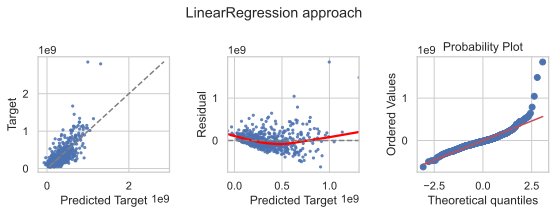

In [870]:
diagnostic_plots(fit.fittedvalues, y_train, fit.resid)

# Using the model to create predictions. 

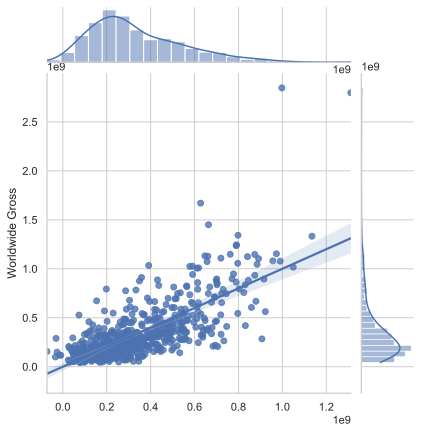

In [815]:
#Ploting the predicted versus the real values of y. 
preds = lm.predict(X_train) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_train, kind='reg')

In [816]:
#Now, let's evaluate some metrics for this model. 

In [871]:
rmse = mean_squared_error(y_train, preds, squared=False)
mae = mean_absolute_error(y_train, preds)
print(rmse)
print(mae)

199332122.25214523
131654743.29871973


In [818]:
#Now, I'll try to use some other models because the lineal one is not working that greatly.

In [819]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_hold_out.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_hold_out.values)

lm_poly = LinearRegression()

In [820]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.5f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.5f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.44827
Ridge Regression val R^2: 0.45207
Degree 2 polynomial regression val R^2: -4.787


In [821]:
#The numbers are really close between Ridge and Linear.

In [822]:
#Now, we will apply some cross-validation to confirm which model to use

In [823]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
print(np.mean(cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X_train, y_train, cv=kf, scoring='r2')))

0.41666755981049786
0.4281414163920408


/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.11046e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.33617e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.73672e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.18197e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

In [824]:
# As Ridge was the best model, we will use to train on the entire set of training. 

In [825]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=2)
lm_reg.fit(X_scaled,y)
print('Ridge Regression test R^2: ', lm_reg.score(X_test_scaled, y_test))

Ridge Regression test R^2:  0.5471321127764552


In [826]:
mae = mean_absolute_error(y_test, lm_reg.predict(X_test_scaled))

In [827]:
mae

152974892.49920028

In [65]:
cor = final[final.columns[2:]].corr().copy(deep=True)
upper = np.triu(cor)
cor

,Worldwide Gross,Budget,Runtime,G,PG,PG-13,20th Century Studios,Artisan Entertainment,Dimension Films,DreamWorks,...,G_Horror,G_Music,G_Musical,G_Mystery,G_Romance,G_Sci-Fi,G_Sport,G_Thriller,G_War,G_Western
Worldwide Gross,1.00,0.67,0.36,0.03,0.02,0.16,-0.00,-0.01,-0.04,0.05,...,-0.13,-0.05,0.05,-0.06,-0.12,0.31,-0.10,-0.09,-0.05,-0.05
Budget,0.67,1.00,0.34,0.07,0.05,0.23,0.02,-0.04,-0.06,0.10,...,-0.22,-0.12,0.01,-0.11,-0.20,0.39,-0.07,-0.08,-0.02,0.03
Runtime,0.36,0.34,1.00,-0.11,-0.34,0.23,0.00,-0.05,-0.07,-0.06,...,-0.16,-0.00,-0.06,0.03,-0.01,0.12,-0.01,0.08,0.18,0.09
G,0.03,0.07,-0.11,1.00,-0.07,-0.12,-0.00,-0.00,-0.01,-0.02,...,-0.04,0.02,0.10,-0.04,-0.02,-0.03,0.06,-0.08,-0.02,0.05
PG,0.02,0.05,-0.34,-0.07,1.00,-0.54,-0.02,-0.02,0.03,0.10,...,-0.11,0.03,0.18,-0.06,-0.01,-0.02,0.07,-0.30,-0.09,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G_Sci-Fi,0.31,0.39,0.12,-0.03,-0.02,0.17,0.06,-0.02,0.01,-0.00,...,-0.03,-0.09,-0.10,-0.02,-0.18,1.00,-0.06,0.01,-0.08,-0.03
G_Sport,-0.10,-0.07,-0.01,0.06,0.07,-0.00,-0.01,-0.01,-0.02,0.00,...,-0.05,-0.03,-0.04,-0.07,-0.05,-0.06,1.00,-0.12,-0.01,0.02
G_Thriller,-0.09,-0.08,0.08,-0.08,-0.30,0.10,-0.02,-0.02,-0.05,-0.04,...,0.18,-0.10,-0.09,0.27,-0.19,0.01,-0.12,1.00,-0.01,0.01
G_War,-0.05,-0.02,0.18,-0.02,-0.09,-0.03,-0.01,-0.01,-0.02,0.01,...,-0.03,-0.03,-0.03,-0.04,-0.05,-0.08,-0.01,-0.01,1.00,-0.02


In [725]:
X1 = final.drop(['Domestic total gross', 'Worldwide Gross', 'Release date', 'Domestic opening', \
                 'Release date'], axis=1)
y1 = final['Worldwide Gross']

In [726]:
X1.shape

(1060, 62)

In [727]:
X1.columns

Index(['Budget', 'Runtime', 'G', 'PG', 'PG-13', '20th Century Studios',
       'Artisan Entertainment', 'Dimension Films', 'DreamWorks',
       'DreamWorks Distribution', 'Entertainment Studios Motion Pictures',
       'FilmDistrict', 'Focus Features', 'Fox Searchlight Pictures',
       'Gramercy Pictures (I)', 'IFC Films', 'Lionsgate', 'MGM/Weinstein',
       'Metro-Goldwyn-Mayer (MGM)', 'Miramax', 'Neon', 'New Line Cinema',
       'Newmarket Films', 'Overture Films', 'Paramount Pictures',
       'Relativity Media', 'Revolution Studios', 'Roadside Attractions',
       'Rogue Pictures', 'STX Entertainment', 'Screen Gems',
       'Sony Pictures Classics', 'Sony Pictures Entertainment (SPE)',
       'Summit Entertainment', 'The Weinstein Company', 'TriStar Pictures',
       'Twentieth Century Fox', 'USA Films', 'United Artists',
       'Universal Pictures', 'Walt Disney Studios Motion Pictures',
       'Warner Bros.', 'G_Action', 'G_Adventure', 'G_Animation', 'G_Biography',
       'G_Com

In [728]:
n_columns = ['Budget', 'Runtime']

In [729]:
y1.shape

(1060,)

In [730]:
X1, X1_test, y1, y1_test = train_test_split(X1, y1, test_size=.2, random_state=10)

In [731]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=.25, random_state=5)

In [732]:
X1_train.head(3)

,Budget,Runtime,G,PG,PG-13,20th Century Studios,Artisan Entertainment,Dimension Films,DreamWorks,DreamWorks Distribution,...,G_Horror,G_Music,G_Musical,G_Mystery,G_Romance,G_Sci-Fi,G_Sport,G_Thriller,G_War,G_Western
Title,,,,,,,,,,,,,,,,,,,,,
Wonder Woman,149000000.00,141.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
Lethal Weapon 3,35000000.00,118.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Up,175000000.00,96.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [733]:
X1_val.head(3)

,Budget,Runtime,G,PG,PG-13,20th Century Studios,Artisan Entertainment,Dimension Films,DreamWorks,DreamWorks Distribution,...,G_Horror,G_Music,G_Musical,G_Mystery,G_Romance,G_Sci-Fi,G_Sport,G_Thriller,G_War,G_Western
Title,,,,,,,,,,,,,,,,,,,,,
Storks,70000000.00,87.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ride Along,25000000.00,99.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dumb and Dumber to,40000000.00,109.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dataframe has the dummies, now, gonna standardize the numeric columns

In [734]:
scaler = StandardScaler()

In [735]:
scaler.fit(X1_train.loc[:,['Budget','Runtime']])

StandardScaler()

In [736]:
X1_train.loc[:,['Budget','Runtime']] = scaler.transform(X1_train.loc[:,['Budget','Runtime']])

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [737]:
X1_val.loc[:,['Budget','Runtime']] = scaler.transform(X1_val.loc[:,['Budget','Runtime']])
X1_test.loc[:,['Budget','Runtime']] = scaler.transform(X1_test.loc[:,['Budget','Runtime']])

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [739]:
X1_val.head(3)

,Budget,Runtime,G,PG,PG-13,20th Century Studios,Artisan Entertainment,Dimension Films,DreamWorks,DreamWorks Distribution,...,G_Horror,G_Music,G_Musical,G_Mystery,G_Romance,G_Sci-Fi,G_Sport,G_Thriller,G_War,G_Western
Title,,,,,,,,,,,,,,,,,,,,,
Storks,-0.21,-1.45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ride Along,-0.94,-0.83,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dumb and Dumber to,-0.70,-0.31,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating a Lasso model with the regularized training data

In [740]:
## Fit a LASSO model on the standardized data
lasso_model = Lasso(alpha = 1000000)
lasso_model.fit(X1_train,y1_train)

Lasso(alpha=1000000)

In [741]:
list(zip(X1_train.columns, lasso_model.coef_))

[('Budget', 166483074.37),
 ('Runtime', 75265161.89217262),
 ('G', -0.0),
 ('PG', 0.0),
 ('PG-13', 7749059.616447831),
 ('20th Century Studios', -0.0),
 ('Artisan Entertainment', 0.0),
 ('Dimension Films', 0.0),
 ('DreamWorks', 0.0),
 ('DreamWorks Distribution', -0.0),
 ('Entertainment Studios Motion Pictures', -0.0),
 ('FilmDistrict', -0.0),
 ('Focus Features', -0.0),
 ('Fox Searchlight Pictures', 0.0),
 ('Gramercy Pictures (I)', 0.0),
 ('IFC Films', 0.0),
 ('Lionsgate', -0.0),
 ('MGM/Weinstein', -0.0),
 ('Metro-Goldwyn-Mayer (MGM)', -0.0),
 ('Miramax', -0.0),
 ('Neon', 0.0),
 ('New Line Cinema', 0.0),
 ('Newmarket Films', 0.0),
 ('Overture Films', 0.0),
 ('Paramount Pictures', -49769982.657745406),
 ('Relativity Media', -0.0),
 ('Revolution Studios', -0.0),
 ('Roadside Attractions', -0.0),
 ('Rogue Pictures', 0.0),
 ('STX Entertainment', -0.0),
 ('Screen Gems', -0.0),
 ('Sony Pictures Classics', -0.0),
 ('Sony Pictures Entertainment (SPE)', -1109786.6195481739),
 ('Summit Entertainme

In [828]:
#We tried to relly on this snipet of code to find an optimal alpha, but the results wheren't 
#any better than from randoms alpha we tried. 

In [607]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))
print(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [ 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X1_train.values, y1_train)
    
    val_set_pred = pipe.predict(X1_val.values)
    err_vec_val[i] = mae(y1_val, val_set_pred)

200


/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038364739919217e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038367371457802e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038362725969633e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/an

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038364611511316e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038366157954724e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038367892090655e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/an

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038367981039636e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038367977440604e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038368083941765e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/an

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038371150769398e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.303837131287298e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.303837143823952e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anac

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038384616905134e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.303838549719257e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038386407487222e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/ana

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.303843922928255e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038442666347622e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038446270341304e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/ana

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038644611193283e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038657769877258e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3038671550201897e+18, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(
/Users/robertolinares/opt/an

In [608]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_val)]

100.0

In [780]:
## Fit a LASSO model on the standardized data
lasso_model = Lasso(alpha = 100)
lasso_model.fit(X1_train,y1_train)

/Users/robertolinares/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.582276081253048e+17, tolerance: 6018971330668996.0
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=100)

In [788]:
s = dict(zip(X1_train.columns, lasso_model.coef_))

In [782]:
r2_score(y1_train,lasso_model.predict(X1_train))

0.5580337897423693

# Now, trying to make predictions

In [756]:
y1_test[4]

1128462972.0

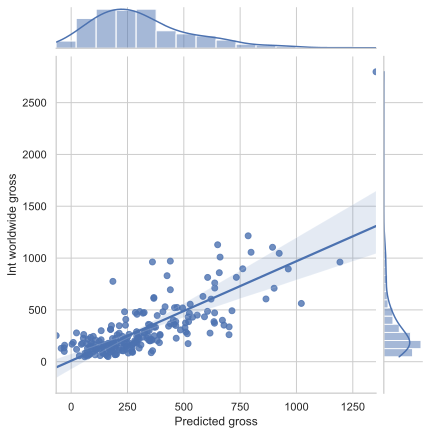

In [783]:
#Ploting the predicted versus the real values of y. 
test_set_pred = lasso_model.predict(X1_test) # generate predictions (on training data) using fit model

p = sns.jointplot(x=test_set_pred/1e6,y=y1_test/1e6, kind='reg', height = 6, ratio= 7, space =0.2, \
                 marginal_ticks = False)

#plt.suptitle("Predictions using the models")

p.set_axis_labels('Predicted gross', 'Int worldwide gross', fontsize=12)
p.ax_joint.set_xticks([0, 250, 500, 750, 1000, 1250])
p.ax_joint.set_yticks([0, 500 , 1000 , 1500, 2000, 2500]);

In [784]:
r2_score(y1_train, lasso_model.predict(X1_train))

0.5580337897423693

In [872]:
mae(y1_train,lasso_model.predict(X1_train))

TypeError: 'numpy.float64' object is not callable

In [769]:
#The mae with the test data is:

In [786]:
mae(y1_test, lasso_model.predict(X1_test))

130516192.90892155

In [829]:
list(zip(X1_train.columns, lasso_model.coef_))

[('Budget', 163274231.57693592),
 ('Runtime', 83306875.25535034),
 ('G', -39043072.73493962),
 ('PG', 4827431.865582573),
 ('PG-13', 18610830.35041992),
 ('20th Century Studios', -80194497.09023993),
 ('Artisan Entertainment', 189463776.5254223),
 ('Dimension Films', -5590393.922487222),
 ('DreamWorks', 20324412.942557722),
 ('DreamWorks Distribution', -59772070.32885339),
 ('Entertainment Studios Motion Pictures', -5992092.123359145),
 ('FilmDistrict', -52253650.54990291),
 ('Focus Features', -6779920.226660013),
 ('Fox Searchlight Pictures', 41967994.068695605),
 ('Gramercy Pictures (I)', 108390193.77038404),
 ('IFC Films', 0.0),
 ('Lionsgate', -24449267.475998845),
 ('MGM/Weinstein', -65396948.55940246),
 ('Metro-Goldwyn-Mayer (MGM)', -95256281.05587138),
 ('Miramax', -49014441.313804135),
 ('Neon', 0.0),
 ('New Line Cinema', 42202064.25973247),
 ('Newmarket Films', 354083005.52925444),
 ('Overture Films', 0.0),
 ('Paramount Pictures', -59808559.46079176),
 ('Relativity Media', -158

In [795]:
s

{'Budget': 163274231.57693592,
 'Runtime': 83306875.25535034,
 'G': -39043072.73493962,
 'PG': 4827431.865582573,
 'PG-13': 18610830.35041992,
 '20th Century Studios': -80194497.09023993,
 'Artisan Entertainment': 189463776.5254223,
 'Dimension Films': -5590393.922487222,
 'DreamWorks': 20324412.942557722,
 'DreamWorks Distribution': -59772070.32885339,
 'Entertainment Studios Motion Pictures': -5992092.123359145,
 'FilmDistrict': -52253650.54990291,
 'Focus Features': -6779920.226660013,
 'Fox Searchlight Pictures': 41967994.068695605,
 'Gramercy Pictures (I)': 108390193.77038404,
 'IFC Films': 0.0,
 'Lionsgate': -24449267.475998845,
 'MGM/Weinstein': -65396948.55940246,
 'Metro-Goldwyn-Mayer (MGM)': -95256281.05587138,
 'Miramax': -49014441.313804135,
 'Neon': 0.0,
 'New Line Cinema': 42202064.25973247,
 'Newmarket Films': 354083005.52925444,
 'Overture Films': 0.0,
 'Paramount Pictures': -59808559.46079176,
 'Relativity Media': -15868093.2451963,
 'Revolution Studios': -51559349.332

In [860]:
y1_test

Title
Girls Trip                                                                             140552359.00
Maleficent: Mistress of Evil                                                           491730089.00
The Thomas Crown Affair                                                                124305181.00
Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan    262552893.00
Captain Marvel                                                                        1128462972.00
                                                                                           ...     
Gulliver's Travels                                                                     237382724.00
The X Files                                                                            189176423.00
Julie & Julia                                                                          129540522.00
Blow                                                                                    832822

In [856]:
#Predictions

In [861]:
lasso_model.predict(X1_test)[-1]

761656242.8245323

In [ ]:
# Harry Potter and the Globet of Fire Real = 896 millions , predicted  = 762 millions

In [866]:
lasso_model.predict(X1_test)[-5]

317642055.16417176

In [ ]:
# Gulliver's Travels
#Predicition 318 millions Real: 237 millions. 

In [867]:
lasso_model.predict(X1_test)[3]

55635222.938066125

In [868]:
#Borat: Cultural Learnings of America
#Prediction: 55millions Real: 263 millions. 